In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import re

from ResearchTools.Sweep import sweep
from ResearchTools.Dict import  dict_product, last_dict_key, last_dict_value, take_dicts, dict_mask



from VertexTissue.Validation.Viscoelastic.Step2.Step2_bis import angle_timeseries, depth_timeline, extension_timeseries, final_arc_ratio, final_cone_slope, final_depth, final_inter_arc_distance, final_width, inter_arc_distance_timeline, intercalations, run, phi0s, phi0_SLS,  base_path, kws_baseline,   final_angle, L0_T1s, final_inter_arc_depth, final_lumen_depth
from VertexTissue.Validation.Viscoelastic.Step2.Step2_bis import extension_timeline,  ecs, kws_SLS_baseline_thresh,  kws_SLS_baseline_thresh_ext,  kws_SLS_baseline_thresh_con

from VertexTissue.Plotting import pcolor, contour, hatched_contour, add_colorbar_to_side, make_lines_rainbow, panelled_row


kws_contract = kws_SLS_baseline_thresh_con
kws_extend = kws_SLS_baseline_thresh_ext
kws_sym = kws_SLS_baseline_thresh

phi0s=phi0_SLS


##################################################################
###################### INVAGINATION DEPTH ########################
##################################################################

depth_func = final_depth
refresh=False

depth_baseline  = sweep(phi0s, run, kw=kws_contract, pre_process = depth_func,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

depth_extend  = sweep(phi0s, run, kw=kws_extend, pre_process = depth_func,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

depth_sym  = sweep(phi0s, run, kw=kws_sym, pre_process = depth_func,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

Apical nodes added correctly.
Number of apical nodes are 421
Basal Nodes Added
Vertical Connections made


In [2]:
pwd()

'/mnt/xubuntu/home/lmackay/git/3d-vertex'

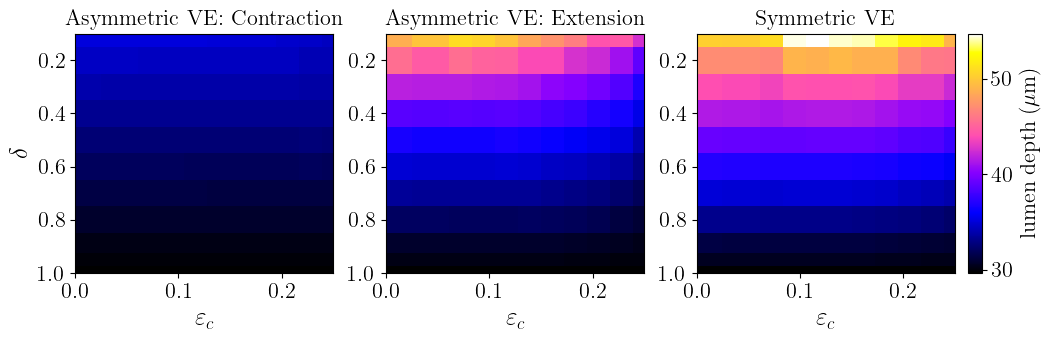

In [3]:

##################################################################
##################### DELTA DEPTH HEATMAP ########################
##################################################################


# for i in range(mid.shape[-1]):
        # plt.sca(axs[i])
depths= (depth_baseline, depth_extend, depth_sym)

vmax = max(*[np.nanmax(d) for d in depths])
cb_ax = panelled_row(depths, plot_func=lambda d: pcolor( ecs, phi0s, d, vmax=vmax, cmap='gnuplot2'),
            xlabel=r'$\varepsilon_c$', ylabel='$\delta$',
             panel_titles=('Asymmetric VE: Contraction','Asymmetric VE: Extension', 'Symmetric VE'),
             colorbar=True, colorbar_label=r'$\rm{lumen\;depth}\;(\mu \rm{m})$')

plt.savefig('invagination_depth_VE.pdf', bbox_extra_artists=[cb_ax], bbox_inches='tight')
#fig.savefig('invagination_depth_VE.png', bbox_extra_artists=[cb_ax], bbox_inches='tight', dpi=200)

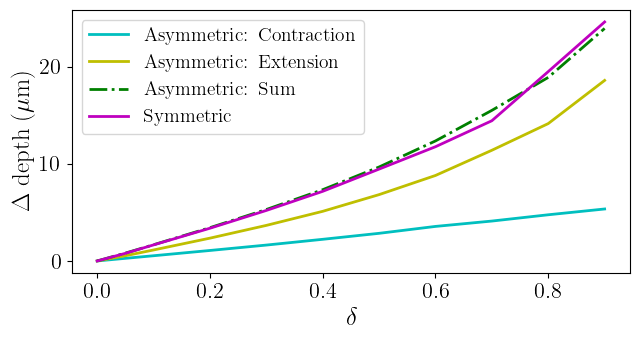

In [4]:
##################################################################
##################### DELTA DEPTH SLICE ##########################
##################################################################


fig=plt.figure()
fig.set_size_inches(6.5, 3.5)
slice=5
plt.plot(1-phi0s, depth_baseline[:,slice]-depth_baseline[0,0], color='c', label='Asymmetric: Contraction',linewidth=2)
# plt.plot(phi0s, depth_baseline_edge[:,slice]-depth_baseline_edge[0,0], color='c', linestyle=':', label='Asymmetric: Contraction',linewidth=2)
plt.plot(1-phi0s, depth_extend[:,slice]-depth_baseline[0,0], color='y',linewidth=2, label='Asymmetric: Extension')
# plt.plot(phi0s, depth_extend_edge[:,slice]-depth_baseline_edge[0,0], color='y',linewidth=2, linestyle=':', label='Asymmetric: Extension')
plt.plot(1-phi0s, depth_extend[:,slice]+depth_baseline[:,slice]-2*depth_baseline[0,0], color='g', linestyle='-.',linewidth=2, label='Asymmetric: Sum')
# plt.plot(phi0s, depth_extend_edge[:,slice]+depth_baseline_edge[:,slice]-2*depth_baseline_edge[0,0], color='g', linestyle=':',linewidth=2, label='Asymmetric: Sum')
plt.plot(1-phi0s, depth_sym[:,slice]-depth_baseline[0,0], color='m',linewidth=2, label='Symmetric')
# plt.plot(phi0s, depth_sym_edge[:,slice]-depth_baseline_edge[0,0], color='m',linewidth=2, linestyle=':', label='Symmetric')
plt.legend(loc='upper left')
plt.ylabel(r'$\Delta\;\rm{depth}\;(\mu \rm{m})$')
plt.xlabel('$\delta$')
plt.tight_layout()   
# plt.savefig('asymmetric_vs_symmetric_depth_change.pdf')
# plt.savefig('asymmetric_vs_symmetric_depth_change.png', dpi=200)



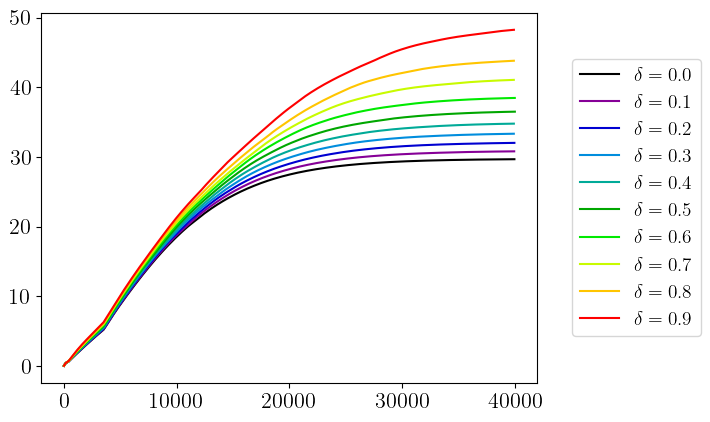

In [5]:
##################################################################
################ DEPTH CONVERGENCE TIMESERIES ####################
##################################################################


refresh=False

depth_timeline_sym = sweep(phi0s, run, kw=kws_sym, pre_process = depth_timeline,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)



depth_timeline_ext = sweep(phi0s, run, kw=kws_extend, pre_process = depth_timeline,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)


depth_timeline_con = sweep(phi0s, run, kw=kws_contract, pre_process = depth_timeline,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)


### TIMESERIES
N=0
for ts, phi0 in zip(depth_timeline_ext[:, slice], phi0s):
        if ts is not None and (np.mod(phi0,0.1)<0.01 or np.mod(phi0,0.1)>0.05):
                N+=1


plt.figure()
i=0
for ts, phi0 in zip(depth_timeline_ext[:, slice], phi0s):
        if ts is not None and (np.mod(phi0,0.1)<0.01 or np.mod(phi0,0.1)>0.05):
                plt.plot(ts[:,0], ts[:,1],label=f'$\delta = {round(1-phi0,2)}$')

                i+=1

make_lines_rainbow(plt.gca())


plt.legend(bbox_to_anchor=(1.05, 0.5),loc='center left')
plt.show()


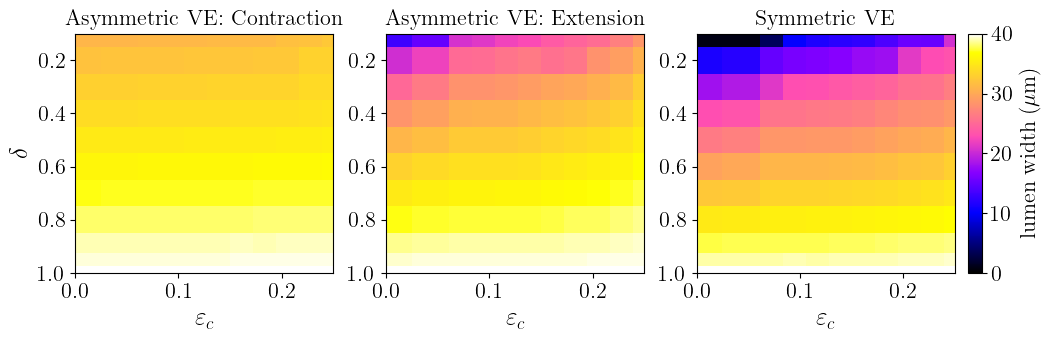

In [6]:
##################################################################
##################### DELTA WIDTH HEATMAP ########################
##################################################################

width_func = final_width

refresh=False

widths_baseline  = sweep(phi0s, run, kw=kws_contract, pre_process = width_func,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

widths_extend  = sweep(phi0s, run, kw=kws_extend, pre_process = width_func,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

widths_sym  = sweep(phi0s, run, kw=kws_sym, pre_process = width_func,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)




widths = ( widths_baseline, widths_extend, widths_sym)
vmax = max(*[np.nanmax(d) for d in widths])



cb_ax = panelled_row(widths, plot_func=lambda d: pcolor( ecs, phi0s, (d), vmin=0, vmax=vmax, cmap='gnuplot2'),
            xlabel=r'$\varepsilon_c$', ylabel='$\delta$',
             panel_titles=('Asymmetric VE: Contraction','Asymmetric VE: Extension', 'Symmetric VE'),
             colorbar=True, colorbar_label=r'$\rm{lumen\;width}\;(\mu \rm{m})$')

plt.savefig('invagination_width_VE.pdf', bbox_extra_artists=[cb_ax], bbox_inches='tight')

In [7]:
cb_ax

<Axes: ylabel='$\\rm{lumen\\;width}\\;(\\mu \\rm{m})$'>